In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import random
device = 'cuda' if torch.cuda.is_available() else 'cpu'
from scipy.ndimage import gaussian_filter
import sys
from tqdm import tqdm
from functools import partial
import acd
from copy import deepcopy
sys.path.append('..')
from transforms_torch import bandpass_filter
plt.style.use('dark_background')
sys.path.append('../../dsets/mnist')
import dset
from model import Net
from util import *
from numpy.fft import *
from torch import nn
from style import *

In [2]:
im_torch, im_orig, label = dset.get_im_and_label(251, device=device) # this will download the mnist dataset
model = Net().to(device)
im_torch = im_torch.to(device)
model.load_state_dict(torch.load('../../dsets/mnist/mnist.model', map_location=device))
model = model.eval().to(device)

# cd transform score

100%|██████████| 120/120 [00:01<00:00, 71.18it/s]


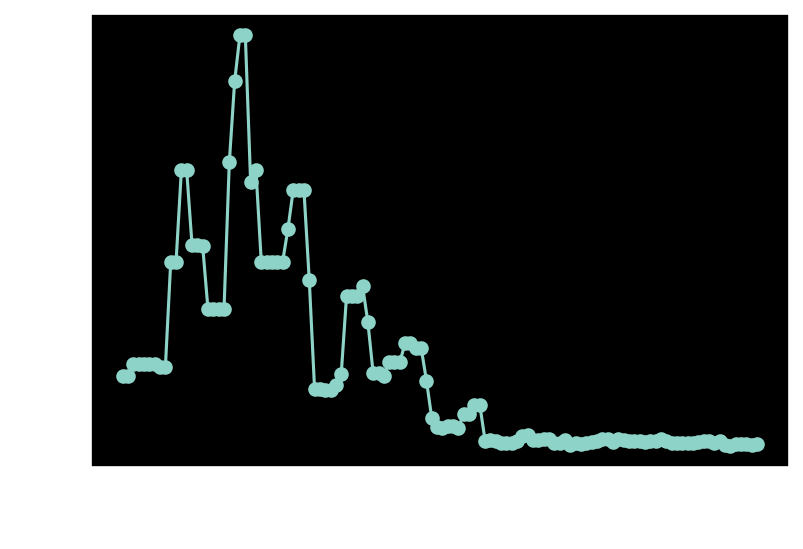

In [3]:
class_num = 1
scores = []
band_centers = np.linspace(0.11, 0.89, 120)
for band_center in tqdm(band_centers):
    score = acd.cd(im_torch, model, mask=None, model_type='mnist', device='cuda', 
                   transform=partial(bandpass_filter, band_center=band_center))[0].flatten()[class_num].item()
    scores.append(score)
    
# plot
plt.figure(dpi=150)
plt.plot(band_centers, scores, 'o-')
plt.xlabel('frequency band $\pm 0.1$')
plt.ylabel('cd score')
plt.show()    